A reinforcement learning environment is basically a simulator or a real world system  designed mainly for to support the model based algorithm to make optimal decisions and Model-based Reinforcement Learning  represents of the environment's dynamics to plan actions. The environment must provide a structure that enables the agent to simulate future outcomes and make informed decisions based on predictions.

In [20]:
import gym
import numpy as np
from gym import spaces 
import matplotlib.pyplot as plt


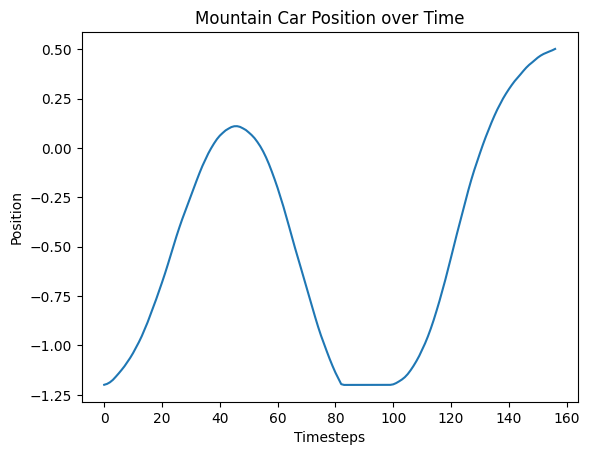

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

# Mountain Car Environment
class MountainCarEnv(gym.Env):
    def __init__(self):
        super(MountainCarEnv, self).__init__()
        self.min_position = -1.2
        self.max_position = 0.6
        self.min_velocity = -0.07
        self.max_velocity = 0.07
        self.goal_position = 0.5
        self.gravity = -0.0025
        self.friction = 0.0001
        self.max_speed = 0.07
        self.action_space = spaces.Discrete(3)  # Left, No action, Right
        self.observation_space = spaces.Box(
            np.array([self.min_position, self.min_velocity]),
            np.array([self.max_position, self.max_velocity]),
            dtype=np.float32
        )
        self.reset()

    def step(self, action):
        position, velocity = self.state

        # Apply action
        if action == 0:  # Move left
            acceleration = -0.0015
        elif action == 2:  # Move right
            acceleration = 0.0015
        else:  # No action
            acceleration = 0

        # Physics of the car
        velocity += acceleration + self.gravity * np.cos(3 * position)
        velocity = np.clip(velocity, -self.max_speed, self.max_speed)
        position += velocity
        position = np.clip(position, self.min_position, self.max_position)

        self.state = np.array([position, velocity])

        # Reward and done conditions
        reward = -1
        done = False
        if position >= self.goal_position:
            reward = 0
            done = True

        return self.state, reward, done, {}

    def reset(self):
        self.state = np.array([self.min_position, 0])
        return self.state

    def render(self):
        # A simple visualization of the environment
        print(f"Position: {self.state[0]}, Velocity: {self.state[1]}")

# Initialize the environment
env = MountainCarEnv()

# Plot the car's position over time
positions = []
for episode in range(1):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Random policy for exploration
        state, reward, done, _ = env.step(action)
        positions.append(state[0])  # Record the position

# Plot the positions
plt.plot(positions)
plt.title("Mountain Car Position over Time")
plt.xlabel("Timesteps")
plt.ylabel("Position")
plt.show()
